In [4]:
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [5]:
print(corpus)

['king is a strong man', 'queen is a wise woman', 'boy is a young man', 'girl is a young woman', 'prince is a young king', 'princess is a young queen', 'man is strong', 'woman is pretty', 'prince is a boy will be king', 'princess is a girl will be queen']


In [6]:
#write a function to remove stop words
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        text = text.split(' ')
        for stop_word in stop_words:
            if stop_word in text:
                text.remove(stop_word)
        results.append(' '.join(text))
    return results

In [7]:
corpus = remove_stop_words(corpus)
print(corpus)

['king strong man', 'queen wise woman', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']


In [8]:
#write corpus with unique words
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)
print(len(words))
words

12


{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [20]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

#split sentences into sentences and create a list of sentences
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [21]:
WINDOW_SIZE = 2
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] :
            if neighbor != word:
                data.append([word, neighbor])
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [11]:
import pandas as pd 

for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head(12)


king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [12]:
word2int

{'man': 0,
 'queen': 1,
 'girl': 2,
 'king': 3,
 'boy': 4,
 'prince': 5,
 'wise': 6,
 'princess': 7,
 'pretty': 8,
 'woman': 9,
 'strong': 10,
 'young': 11}

In [18]:
import tensorflow as tf
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


ONE_HOT_DIM = len(words)

#function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding


X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))


# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)





In [24]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

y_label
# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)


# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


In [25]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 10000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train,  y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

I0000 00:00:1732606945.697603 8175801 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


iteration 0 loss is :  2.8702707
iteration 3000 loss is :  1.8301084
iteration 6000 loss is :  1.7832915
iteration 9000 loss is :  1.7643288


In [26]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-9.3944538e-01 -3.2515633e-01]
 [ 7.0425999e-01  2.0029156e+00]
 [ 1.4290603e+00  3.6552935e+00]
 [-8.2905543e-01 -1.4401674e-03]
 [-1.7491497e+00  8.7043476e-01]
 [-1.8567549e+00  1.8746138e-01]
 [ 2.7478778e+00  1.8336506e+00]
 [ 1.5165961e+00  3.7768388e+00]
 [ 3.1554728e+00  5.2189326e-01]
 [ 4.0519601e-01  6.4134806e-01]
 [-4.5941715e+00  1.1156130e+00]
 [-2.4861813e-02  1.7741871e-01]]


In [27]:
w2v_df = pd.DataFrame(vectors, columns = ['x', 'y'])

words_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
words_one_hot = [to_one_hot_encoding(index).astype(int) for index in words_index]


w2v_df['one-hot encoding'] = (list(words_one_hot))
w2v_df['word'] = list(words)
w2v_df = w2v_df[['word', 'one-hot encoding' ,'x', 'y']]
w2v_df



,word,one-hot encoding,x,y
0,man,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.939445,-0.325156
1,queen,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.704260,2.002916
2,girl,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1.429060,3.655293
3,king,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",-0.829055,-0.001440
4,boy,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",-1.749150,0.870435
5,prince,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",-1.856755,0.187461
6,wise,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",2.747878,1.833651
7,princess,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",1.516596,3.776839
8,pretty,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",3.155473,0.521893
9,woman,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",0.405196,0.641348


Matplotlib is building the font cache; this may take a moment.


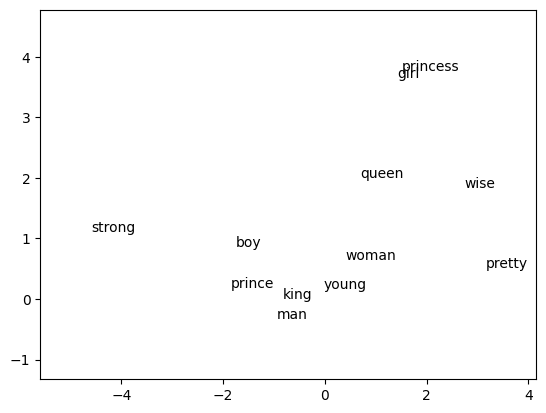

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x, y in zip(w2v_df['word'], w2v_df['x'], w2v_df['y']):
    ax.annotate(word, (x, y ))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (8,6)

plt.show()